# 도파민의 시대: 노래도 짧아졌을까?
##### hi_popularity_spotify_data.csv 
---

# 1. 기초 작업

## 기본 설정

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from seaborn import move_legend

plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

liked = pd.read_csv("high_popularity_spotify_data.csv")
hated = pd.read_csv("low_popularity_spotify_data.csv")

## 간단히 구조 파악·결측치 처리

In [53]:
print(liked.columns)
print(liked.info())
print(liked.duplicated().sum())

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness    

In [54]:
# 쓸 칼럼: track_popularity, track_album_release_date, duration_ms
liked = liked.rename(columns={"track_album_release_date": "year"})
liked = liked.rename(columns={"duration_ms": "length"})

pop = "track_popularity"
year = "year"
len = "length"
count = "count"

liked = liked.dropna()

# 전처리
liked[len] = ((((liked[len] / 1000) // 60 ) * 60)/60).astype(int) ##밀리초를 분 단위로 변환 & 1분 단위로 묶기
liked[year] = liked[year].str[:4].astype(int) ## 연도만 남기고 정수로 변환
liked[pop] = ((liked[pop] // 5) * 5).astype(int) ## 인기 점수를 5 단위로 묶기
liked[count] = 1

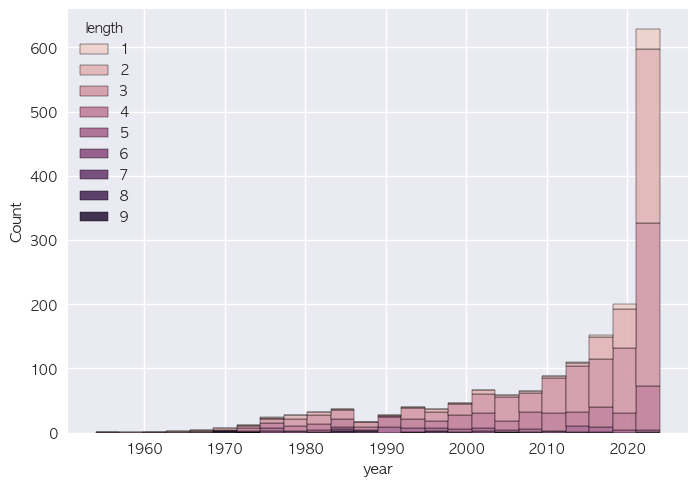

In [55]:
sns.histplot(data = liked, x=year, hue=len, kde=False, stat="count", 
             common_norm=False, multiple="stack", alpha=0.9)
plt.show()

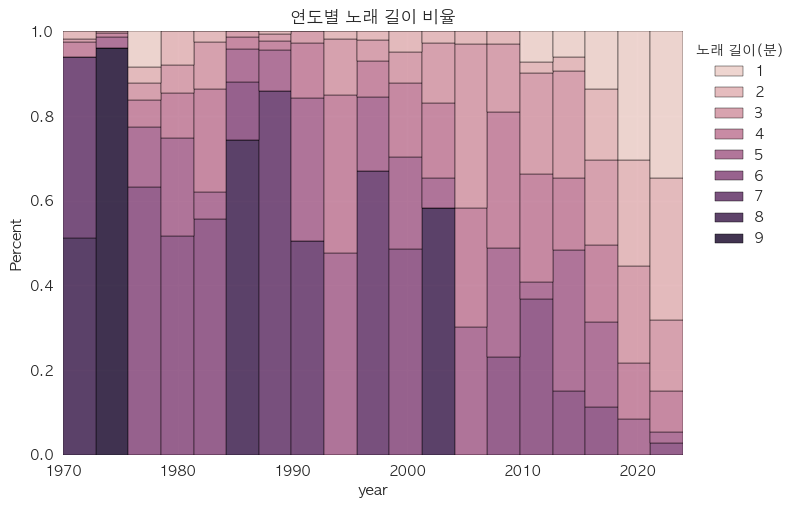

In [56]:
liked = liked.drop(liked[liked[year] < 1970].index)

graph = sns.histplot(data = liked, x=year, hue=len, kde=False, stat="percent", 
             common_norm=False, multiple="fill", alpha=0.9)

move_legend(graph, loc="best", bbox_to_anchor=(1,1))
leg = graph.get_legend()
leg.set_title("노래 길이(분)")

plt.title("연도별 노래 길이 비율")

plt.show()

In [57]:
byPop = liked.groupby([len, year])[pop].mean().reset_index()


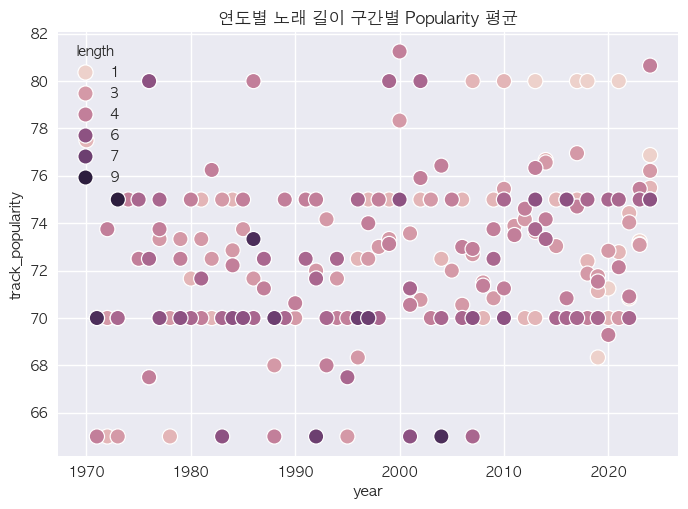

In [ ]:
sns.scatterplot(
    data=byPop, x=year, y=pop, hue=len, marker="o", s=120
)
plt.title("연도별 노래 길이 구간별 Popularity 평균")
plt.show()

### 사람의 특성/시대적 상황/주관성 등 트집 없애기